[nltk_data] Downloading package punkt to /Users/jholt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jholt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jholt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/jholt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/jholt/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/jholt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Processing corpus_files/MovieCorpus.txt...
Detected encoding for corpus_files/MovieCorpus.txt: ascii
Tokens: ['Colonel', 'Durnford', '...', 'William', 'Vereker', '.', 'I', 'hear', 'you', "'ve"]
Tokens: ['Colonel', 'Durnford', '...', 'William', 'Vereker', '.', 'I', 'hear', 'you', "'ve"]
Corpus: MovieCorpus.txt
Number of sentences: 516416
Number of tokens: 4146436
Number of types (lemmas): 52431
Types/Tokens Ratio: 0.0126
Average Sentence Length: 8.03
Min Sentence Length: 1
Max Sentence Length: 172
Corpus: MovieCorpus.txt
Number of sentences: 516416
Number of tokens: 4146436
Number of types (lemmas): 52431
Types/Tokens Ratio: 0.0126
Average Sentence Length: 8.03
Min Sentence Length: 1
Max Sentence Length: 172


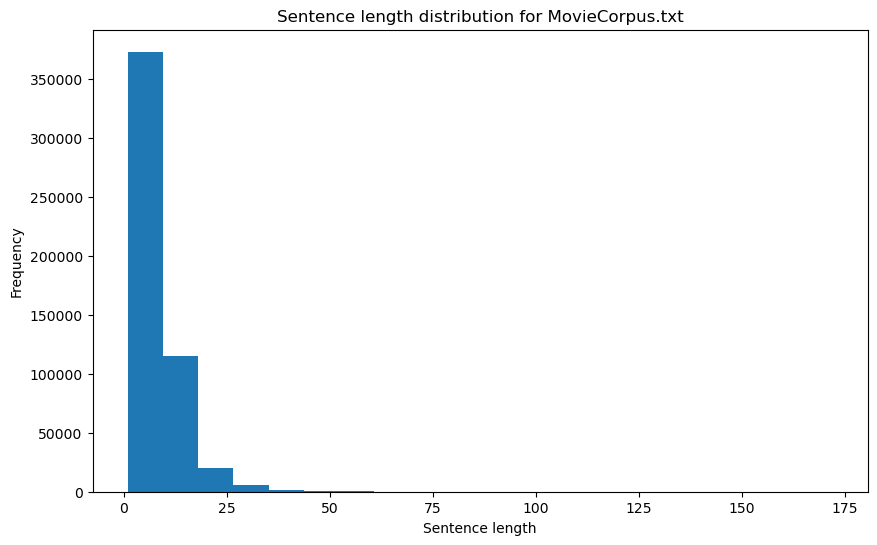

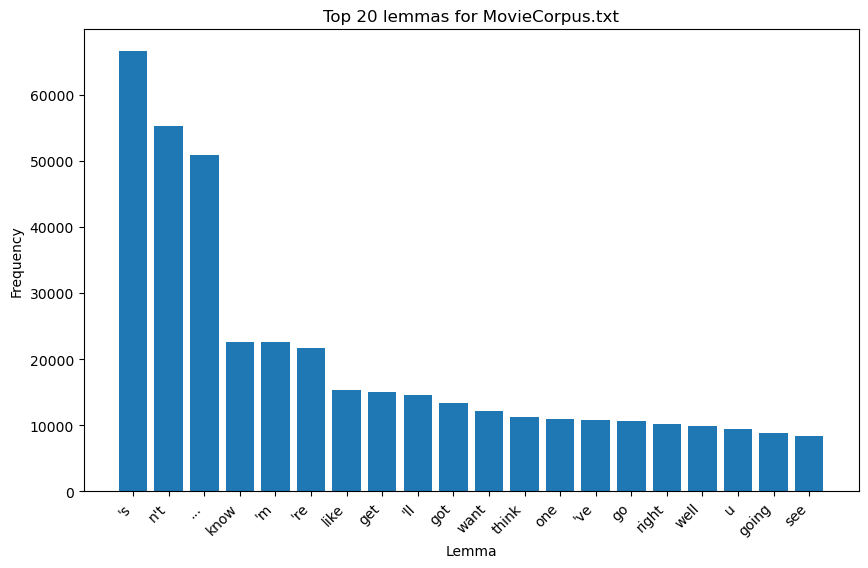

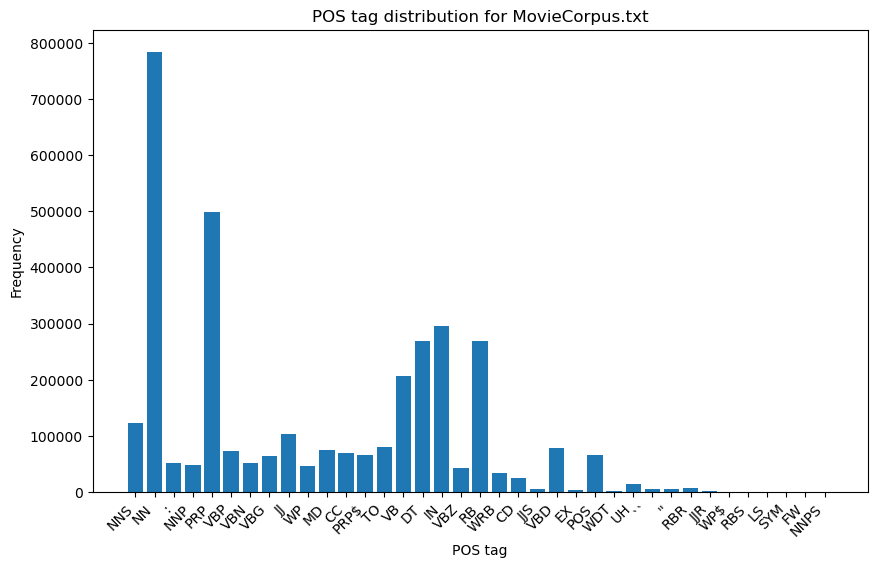

Processing corpus_files/ACL_partial_abstract_corpus.txt...
Detected encoding for corpus_files/ACL_partial_abstract_corpus.txt: ascii
Failed to decode corpus_files/ACL_partial_abstract_corpus.txt with detected encoding 'ascii'. Trying fallback encoding 'utf-8'.
Tokens: ['Cloze-style', 'reading', 'comprehension', 'is', 'a', 'representative', 'problem', 'in', 'mining', 'relationship']
Corpus: ACL_partial_abstract_corpus.txt
Number of sentences: 615
Number of tokens: 15073
Number of types (lemmas): 2832
Types/Tokens Ratio: 0.1879
Average Sentence Length: 24.51
Min Sentence Length: 1
Max Sentence Length: 74
Corpus: ACL_partial_abstract_corpus.txt
Number of sentences: 615
Number of tokens: 15073
Number of types (lemmas): 2832
Types/Tokens Ratio: 0.1879
Average Sentence Length: 24.51
Min Sentence Length: 1
Max Sentence Length: 74


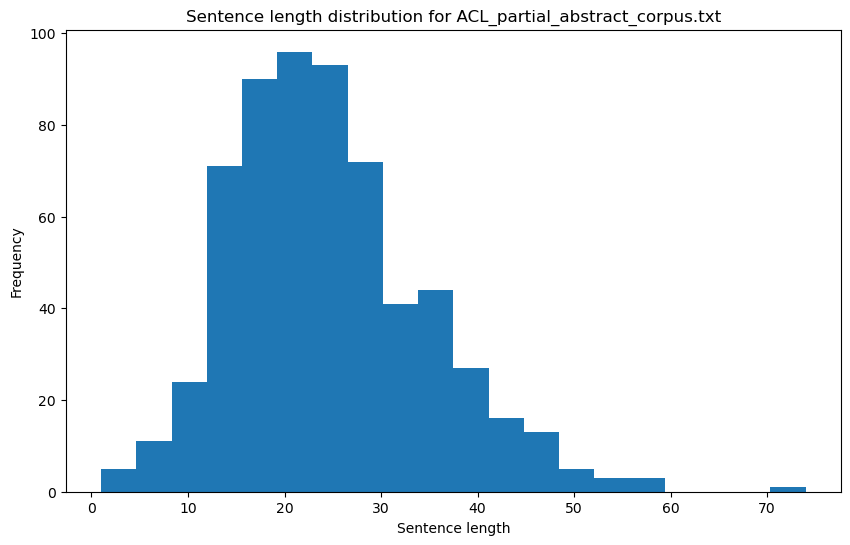

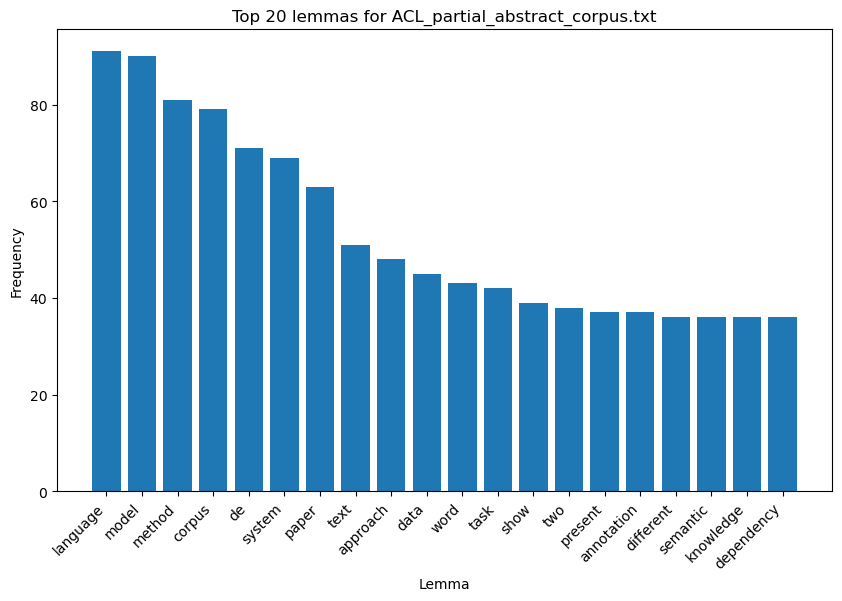

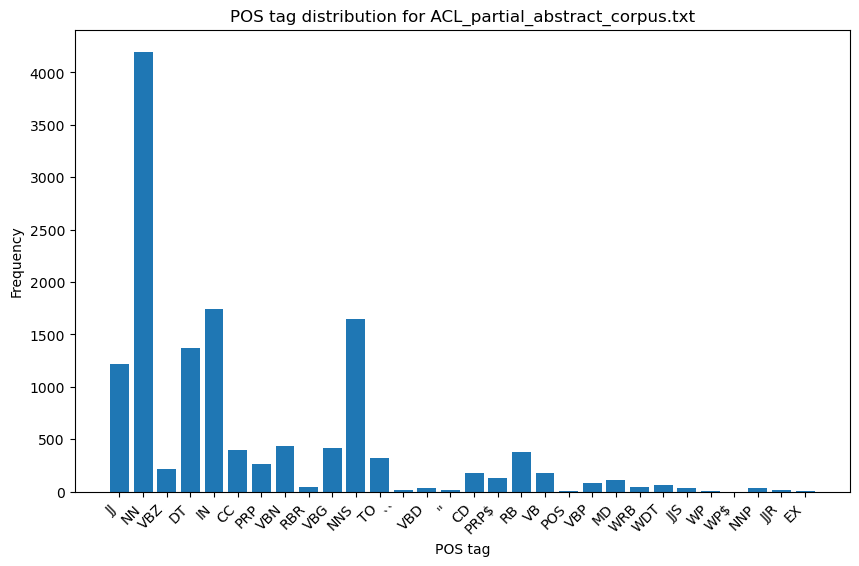

Processing corpus_files/BNCSplitWordsCorpus.txt...
Detected encoding for corpus_files/BNCSplitWordsCorpus.txt: ascii
Tokens: ['You', 'enjoyed', 'yourself', 'in', 'America', 'Eh', 'did', 'you', 'Oh', 'I']
Tokens: ['You', 'enjoyed', 'yourself', 'in', 'America', 'Eh', 'did', 'you', 'Oh', 'I']
Corpus: BNCSplitWordsCorpus.txt
Number of sentences: 606571
Number of tokens: 4333701
Number of types (lemmas): 17314
Types/Tokens Ratio: 0.0040
Average Sentence Length: 7.14
Min Sentence Length: 1
Max Sentence Length: 564
Corpus: BNCSplitWordsCorpus.txt
Number of sentences: 606571
Number of tokens: 4333701
Number of types (lemmas): 17314
Types/Tokens Ratio: 0.0040
Average Sentence Length: 7.14
Min Sentence Length: 1
Max Sentence Length: 564


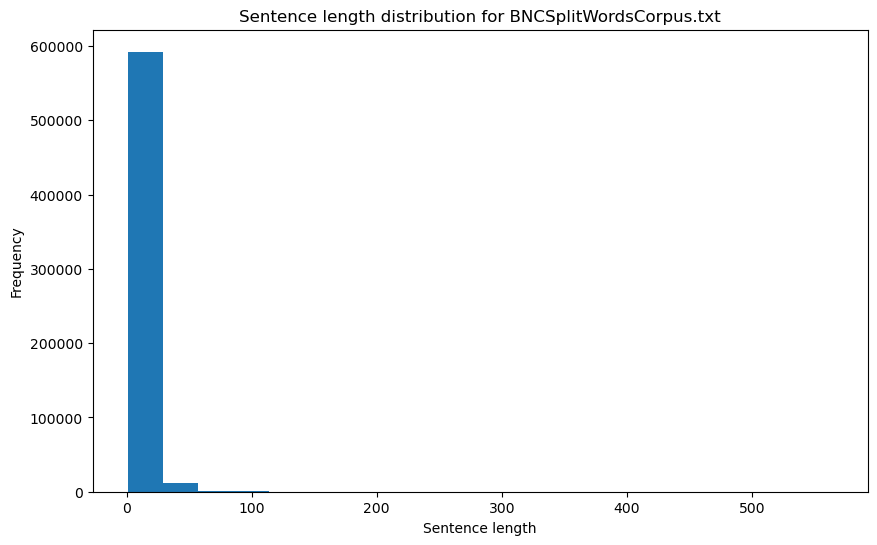

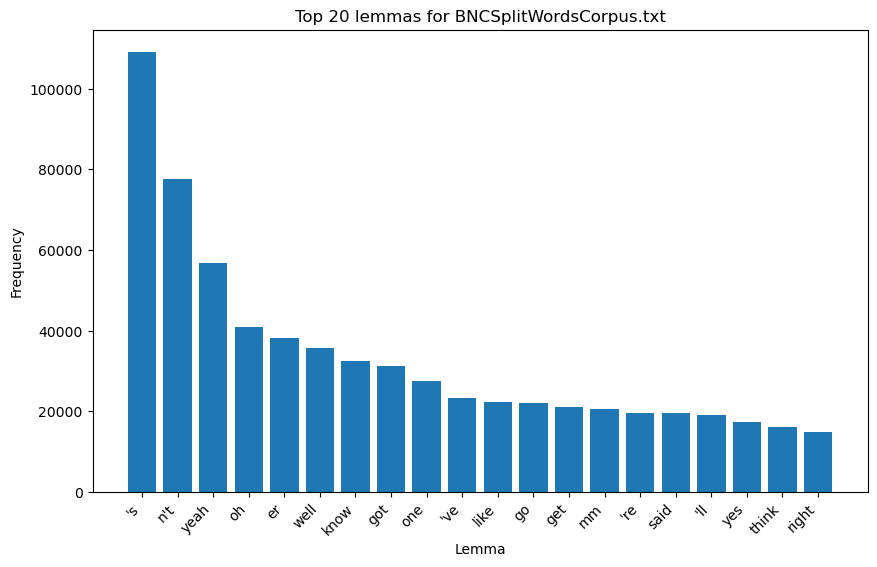

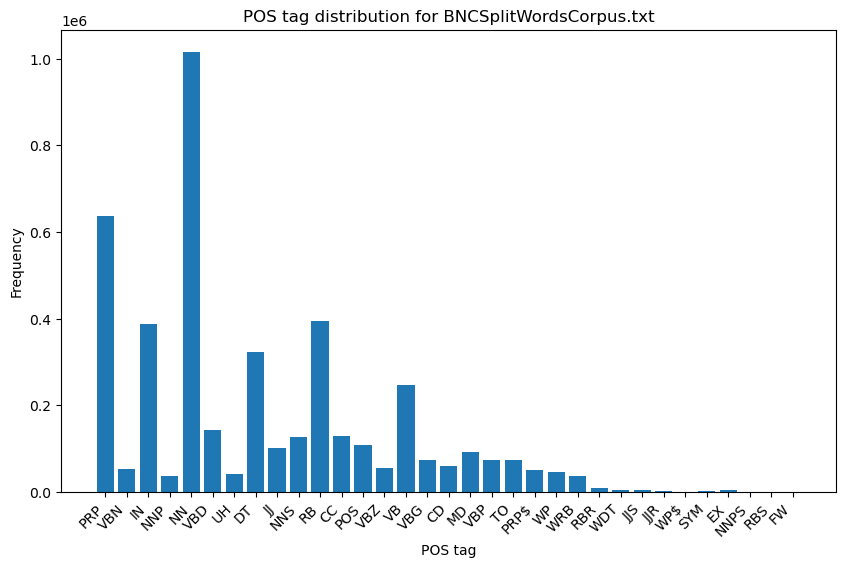

Processing corpus_files/english-brown.txt...
Detected encoding for corpus_files/english-brown.txt: ascii
Tokens: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of']
Corpus: english-brown.txt
Number of sentences: 4192
Number of tokens: 101622
Number of types (lemmas): 11317
Types/Tokens Ratio: 0.1114
Average Sentence Length: 24.24
Min Sentence Length: 2
Max Sentence Length: 123
Corpus: english-brown.txt
Number of sentences: 4192
Number of tokens: 101622
Number of types (lemmas): 11317
Types/Tokens Ratio: 0.1114
Average Sentence Length: 24.24
Min Sentence Length: 2
Max Sentence Length: 123


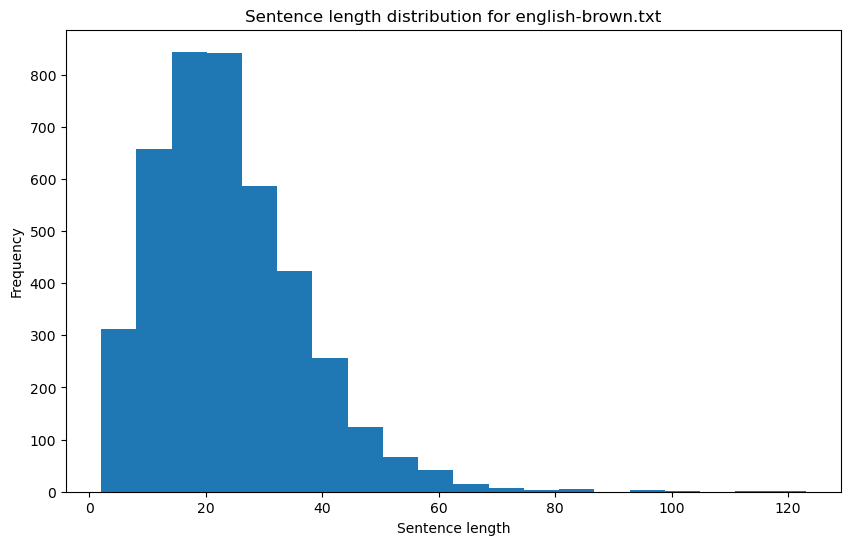

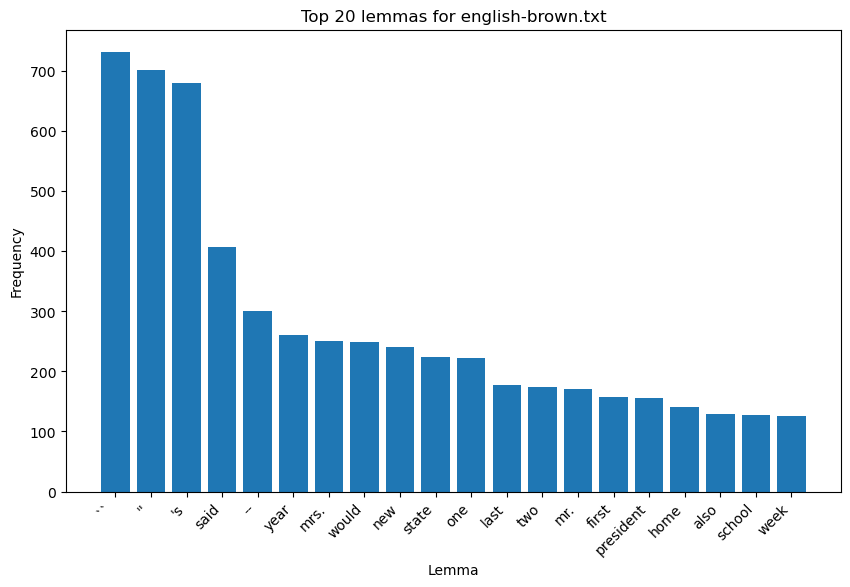

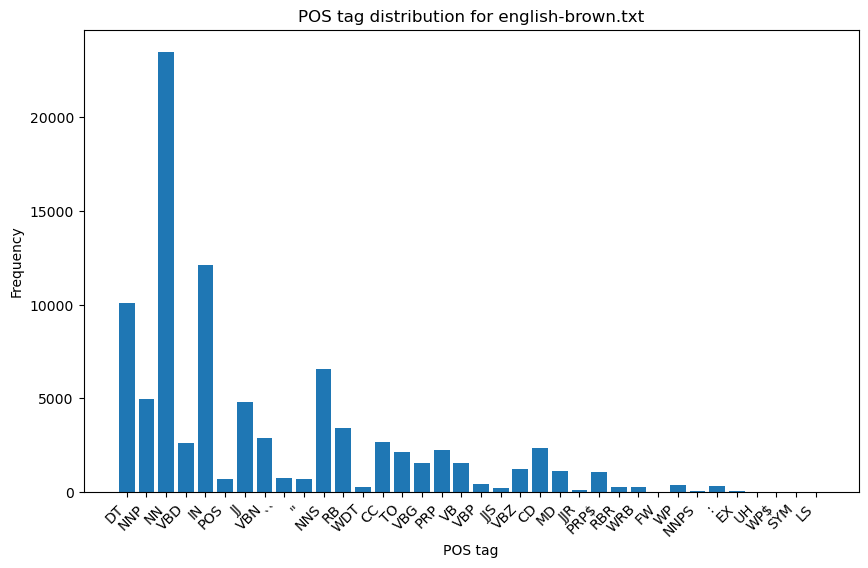

In [2]:
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag, WordNetLemmatizer
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter
import chardet
import string
import re
import sys


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


def detect_file_encoding(file_path):
    """Detect the encoding of a file."""
    with open(file_path, 'rb') as f:
        raw_data = f.read(10000)  # Read the first 10,000 bytes
        result = chardet.detect(raw_data)
        return result['encoding']

def load_corpus(file_path):
    """Load the content of the file with fallback encodings."""
    # Detect encoding using chardet
    encoding = detect_file_encoding(file_path)
    print(f"Detected encoding for {file_path}: {encoding}")
    
    try:
        # Try opening with the detected encoding
        with open(file_path, 'r', encoding=encoding) as f:
            lines = f.readlines()
    except (UnicodeDecodeError, LookupError):
        print(f"Failed to decode {file_path} with detected encoding '{encoding}'. Trying fallback encoding 'utf-8'.")
        try:
            # Fallback to utf-8
            with open(file_path, 'r', encoding='utf-8') as f:
                lines = f.readlines()
        except UnicodeDecodeError:
            print(f"Failed to decode {file_path} with 'utf-8'. Trying fallback encoding 'latin-1'.")
            try:
                # Fallback to latin-1
                with open(file_path, 'r', encoding='latin-1') as f:
                    lines = f.readlines()
            except UnicodeDecodeError as e:
                print(f"Failed to decode {file_path} with all encodings. Error: {e}")
                return None
    return lines


def tokenize_sentences(lines):
    """Tokenize the lines into sentences and words."""
    sentences = []
    tokens = []
    """Add Code"""
    # I need to tokenize the sentences line by line,
    # And then I need to tokenize the words in each sentence
    for line in lines:
        line_sentences = nltk.sent_tokenize(line)
        sentences.extend(line_sentences)
        for sentence in line_sentences:
            tokens.extend(nltk.word_tokenize(sentence))
    
    # print(f"Sentences: {sentences[:10]}")
    print(f"Tokens: {tokens[:10]}")
    return sentences, tokens

def process_tokens(tokens):
    """Process tokens to compute lemmas and POS tags, removing punctuation."""
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    # Regular expression for filtering out punctuation
    punctuation_regex = re.compile(f"[{re.escape(string.punctuation)}]")
    
    """Get list of lemmas and part-of-speech tags, do not include punctuation"""
    lemmas = []
    pos_tags = []
    for word in tokens:
        if punctuation_regex.fullmatch(word):
            continue
            
        if word.lower() not in stop_words:
            lemmas.append(lemmatizer.lemmatize(word.lower()))
            
        pos_tags.append(pos_tag([word])[0][1])
    
    return lemmas, pos_tags


def compute_statistics(sentences, tokens, lemmas, pos_tags):
    """Compute various statistics for the corpus."""
    """Add Code: calculations"""
    sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
    num_sentences = len(sentences)
    num_tokens = len(tokens)
    num_types = len(set(lemmas))
    
    types_tokens_ratio = num_types / num_tokens if num_tokens > 0 else 0
    avg_sentence_length = sum(sentence_lengths) / num_sentences if num_sentences > 0 else 0
    min_sentence_length = min(sentence_lengths) if sentence_lengths else 0
    max_sentence_length = max(sentence_lengths) if sentence_lengths else 0
    
    return {
        "num_sentences": num_sentences,
        "num_tokens": num_tokens,
        "num_types": num_types,
        "types_tokens_ratio": types_tokens_ratio,
        "avg_sentence_length": avg_sentence_length,
        "min_sentence_length": min_sentence_length,
        "max_sentence_length": max_sentence_length,
        "sentence_lengths": sentence_lengths,
        "lemma_distribution": Counter(lemmas),
        "pos_distribution": Counter(pos_tags)
    }



def visualize_statistics(stats, corpus_name):
    """Visualize distributions and statistics."""
    
    # Plot for Sentence length distribution
    plt.figure(figsize=(10, 6))
    plt.hist(stats['sentence_lengths'], bins=20)
    plt.title(f"Sentence length distribution for {corpus_name}")
    plt.xlabel("Sentence length")
    plt.ylabel("Frequency")
    plt.show()

    # Plot for Top 20 lemmas
    top_20 = stats['lemma_distribution'].most_common(20)
    if top_20:
        labels, values = zip(*top_20)
        plt.figure(figsize=(10, 6))
        plt.bar(labels, values)
        plt.title(f"Top 20 lemmas for {corpus_name}")
        plt.xlabel("Lemma")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')
        plt.show()

    # Plot for POS tag distribution
    plt.figure(figsize=(10, 6))
    plt.bar(list(stats['pos_distribution'].keys()), list(stats['pos_distribution'].values()))
    plt.title(f"POS tag distribution for {corpus_name}")
    plt.xlabel("POS tag")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.show()


def analyze_corpus(file_path, corpus_name):
    """Main function to analyze the corpus."""
    lines = load_corpus(file_path)
    if lines is None:
        return

    sentences, tokens = tokenize_sentences(lines)
    lemmas, pos_tags = process_tokens(tokens)
    stats = compute_statistics(sentences, tokens, lemmas, pos_tags)

    # Print statistics
    print(f"Corpus: {corpus_name}")
    print(f"Number of sentences: {stats['num_sentences']}")
    print(f"Number of tokens: {stats['num_tokens']}")
    print(f"Number of types (lemmas): {stats['num_types']}")
    print(f"Types/Tokens Ratio: {stats['types_tokens_ratio']:.4f}")
    print(f"Average Sentence Length: {stats['avg_sentence_length']:.2f}")
    print(f"Min Sentence Length: {stats['min_sentence_length']}")
    print(f"Max Sentence Length: {stats['max_sentence_length']}")

    visualize_statistics(stats, corpus_name)


def process_corpora(txt_files_input):
    """Process and analyze multiple .txt files."""
    for txt_path in txt_files_input:
        print(f"Processing {txt_path}...")
        corpus_name = os.path.basename(txt_path)
        analyze_corpus(txt_path, corpus_name)


if __name__ == "__main__":
    # Option 2: automatically load all .txt files from the local corpus_files directory
    # In a notebook, __file__ is not defined, so we use a relative path.
    # We check if 'corpus_files' is in the current directory, otherwise we try the path from root.
    
    target_path = "corpus_files"
    if not os.path.exists(target_path):
        target_path = os.path.join("methods_in_cl", "corpora", "corpus_files")
        
    if os.path.exists(target_path):
        corpus_dir = target_path
        txt_files = [
            os.path.join(corpus_dir, fname)
            for fname in os.listdir(corpus_dir)
            if fname.lower().endswith(".txt")
        ]
        process_corpora(txt_files)
    else:
        print(f"Could not find corpus directory at '{target_path}' or 'corpus_files'")